In [1]:
from __future__ import division
import os
import sys
import numpy as np
import pandas as pd
import json
from os.path import join
import matplotlib.image as mpimg

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
EXP_dir = '/Volumes/johnson/BassConnections/glassesMapping/accuracyTests'

In [4]:
calibLogDir = join(EXP_dir, 'calibrationLogs')
dataDir = join(EXP_dir, 'data')

## RAW calibration plotting

### Load all data

In [5]:
cond = 'e_0deg'

In [16]:
condData = pd.read_table(join(dataDir, cond, 'output/calibrationProcessed.csv'))

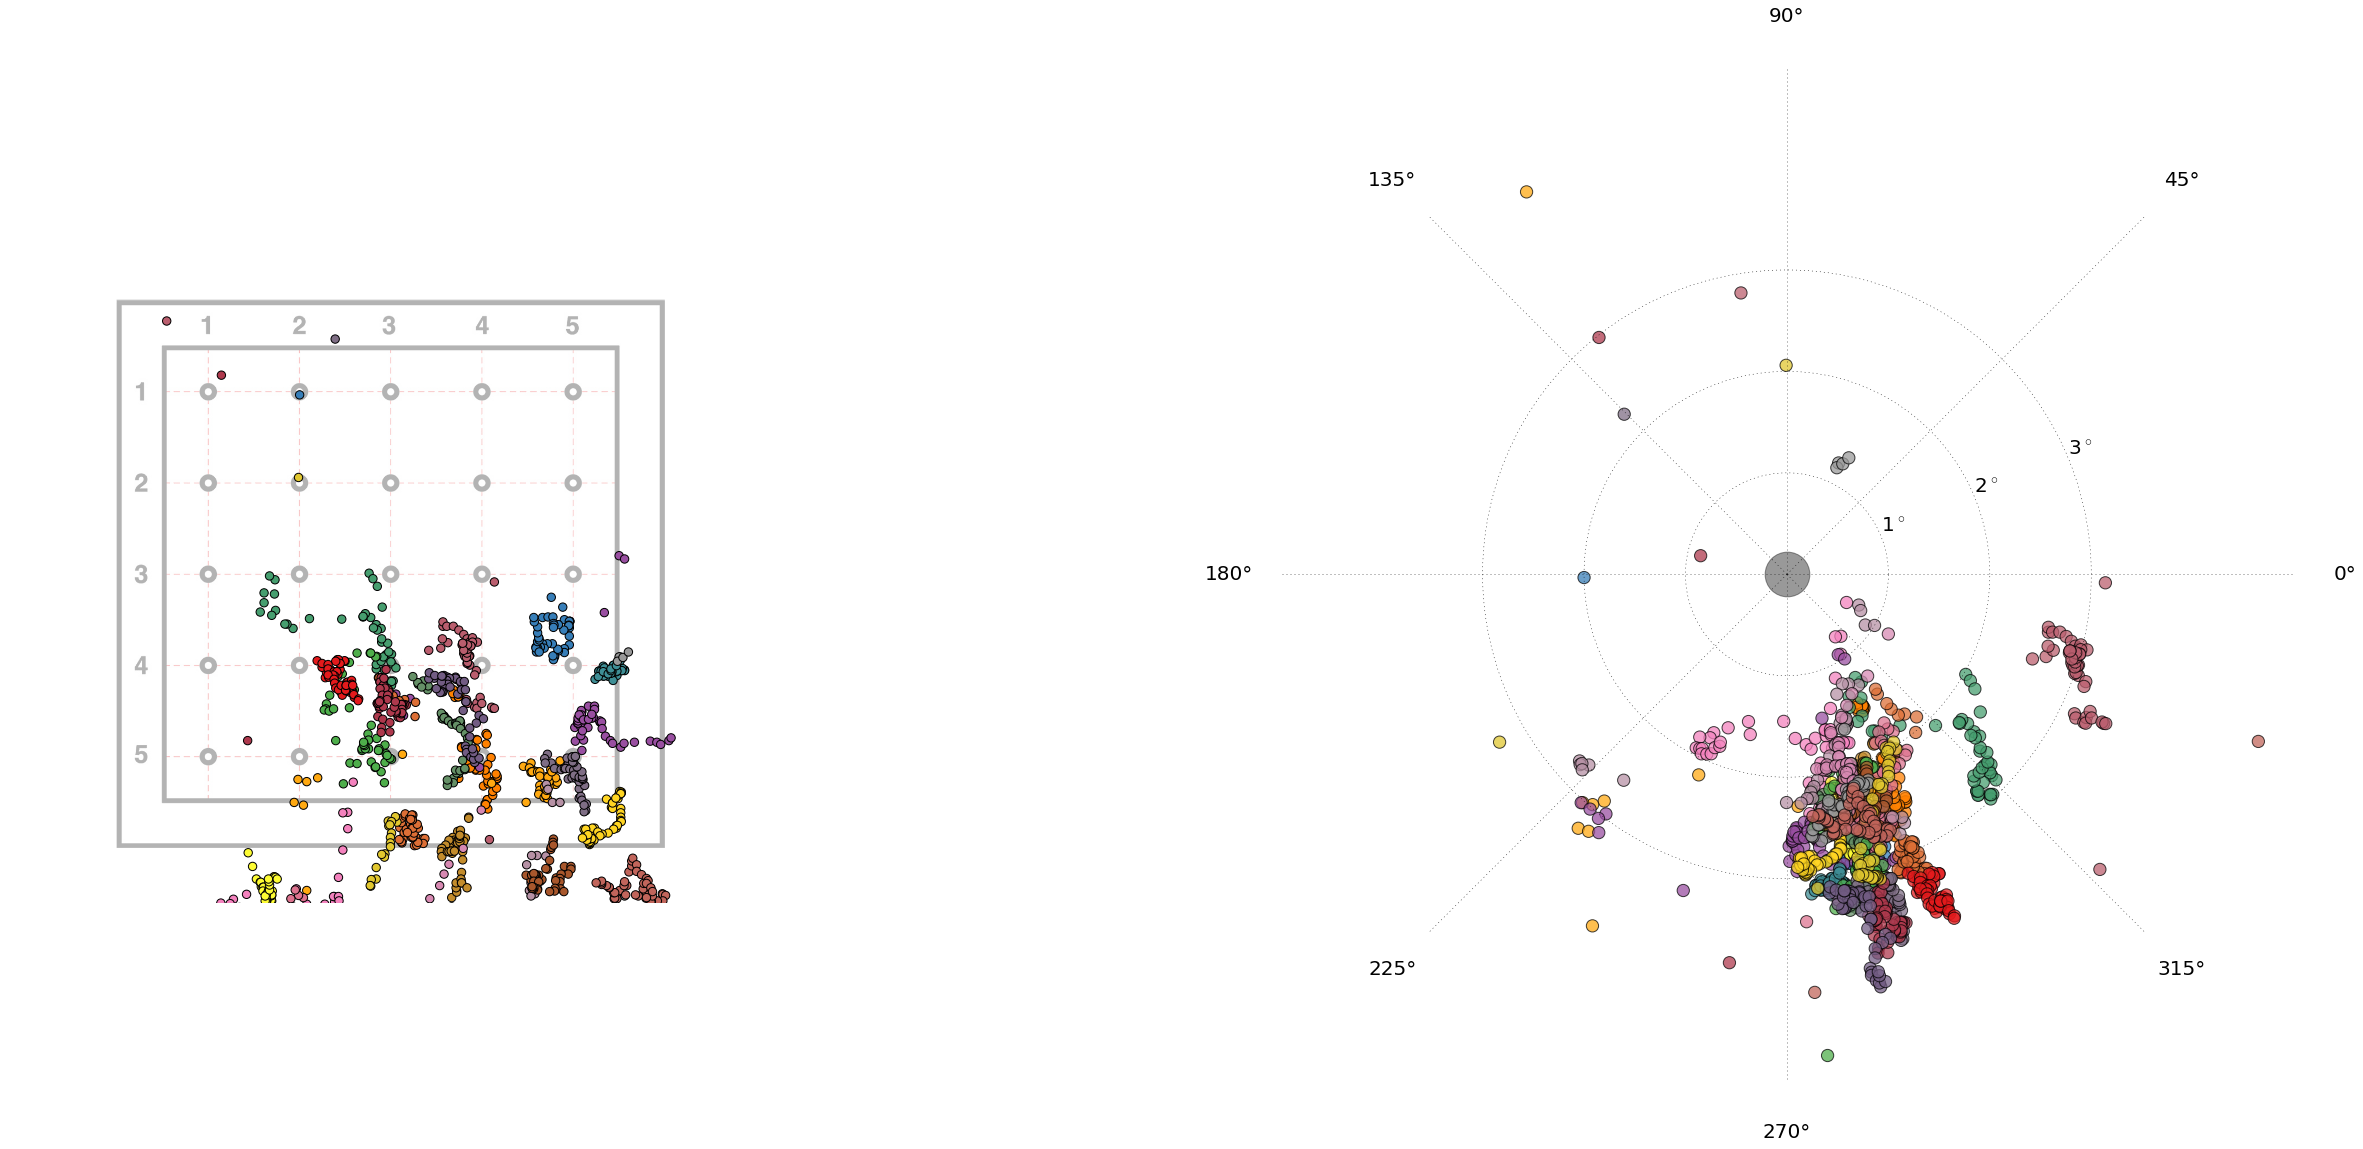

In [23]:
calibGrid = join(EXP_dir, 'referenceGrids/calibrationGrid.jpg')
gridImg = mpimg.imread(calibGrid)

matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
fig = plt.figure(figsize=(40,20))

# Calib Plot
ax = fig.add_subplot(131)
ax.axis("off")
ax.imshow(gridImg, cmap='Greys_r', alpha=0.3)

ax.scatter(condData.calib_X, condData.calib_Y, s=70, c=condData.ptIdx, cmap=cm.Set1)
ax.set_ylim(-100,1100)
ax.set_xlim(-100,1100)
ax.invert_yaxis()


# Polar Plot
ax2 = fig.add_subplot(122, polar=True)
ax2.set_ylim(0,5)
ax2.set_yticks([1,2,3])
ax2.yaxis.set_ticklabels(['1$^\circ$ ', '2$^\circ$ ', '3$^\circ$ '])		# for degree symbol
ax2.scatter(np.deg2rad(condData['angle'].astype(float)), 
                        condData['distance'].astype(float), 
                        s=150, 
                        edgecolor='black', 
                        c=condData['ptIdx'], 
                        cmap='Set1', 
                        alpha=.74)
ax2.scatter(0,0, s=2000, facecolor='black', alpha=.4)  # put circle at center for reference
ax2.spines['polar'].set_visible(False)

# legend
# ax3 = fig.add_subplot(133)
# y = np.arange(0,25)
# x = np.ones(shape=(0,25))
# ax3.scatter(x,y,s=500, c=y, cmap=cm.Set1)
# #ax3.axis('off')
# ax3.set_yticks(range(25))
#plt.tight_layout()


# Summarized Calibration Plotting

In [24]:
summary_df = pd.read_table(join(dataDir, cond, 'output/calibrationSummarized.csv'))

In [35]:
for a in sort(summary_df.ptIdx): 
    print a

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [48]:
# draw connecting lines
for p in sort(summary_df.ptIdx):
    thisPt = summary_df[summary_df.ptIdx == p]
    print thisPt.centX, thisPt.centY
    
    p = p-1
    col = p % 5 + 1
    row = floor(np.true_divide(p,5))+1
    
    idealLocation = ((1000/6)*col, (1000/6)*row)
    #print idealLocation

15    406.84
Name: centX, dtype: float64 15    690.82
Name: centY, dtype: float64
20    475.49
Name: centX, dtype: float64 20    705.33
Name: centY, dtype: float64
22    619.56
Name: centX, dtype: float64 22    732.77
Name: centY, dtype: float64
2    785.5
Name: centX, dtype: float64 2    602.52
Name: centY, dtype: float64
9    904.27
Name: centX, dtype: float64 9    676.55
Name: centY, dtype: float64
3    436.32
Name: centX, dtype: float64 3    614.94
Name: centY, dtype: float64
12    447.28
Name: centX, dtype: float64 12    786.09
Name: centY, dtype: float64
8    607.45
Name: centX, dtype: float64 8    785.96
Name: centY, dtype: float64
17    823.79
Name: centX, dtype: float64 17    848.21
Name: centY, dtype: float64
7    843.45
Name: centX, dtype: float64 7    759.27
Name: centY, dtype: float64
13    629.72
Name: centX, dtype: float64 13    646.38
Name: centY, dtype: float64
11    533.04
Name: centX, dtype: float64 11    928.53
Name: centY, dtype: float64
1    660.21
Name: centX, dt

In [25]:
summary_df.head()

,RMS,centAngle,centDist,centX,centY,percentValid,ptIdx
0,0.67,271.72,1.65,341.60,1108.90,1.00,22
1,0.42,295.66,2.22,660.21,833.53,0.94,13
2,0.58,285.25,2.71,785.50,602.52,0.96,4
3,0.61,313.76,2.34,436.32,614.94,1.00,6
4,0.16,284.53,2.58,274.73,1083.69,0.98,16


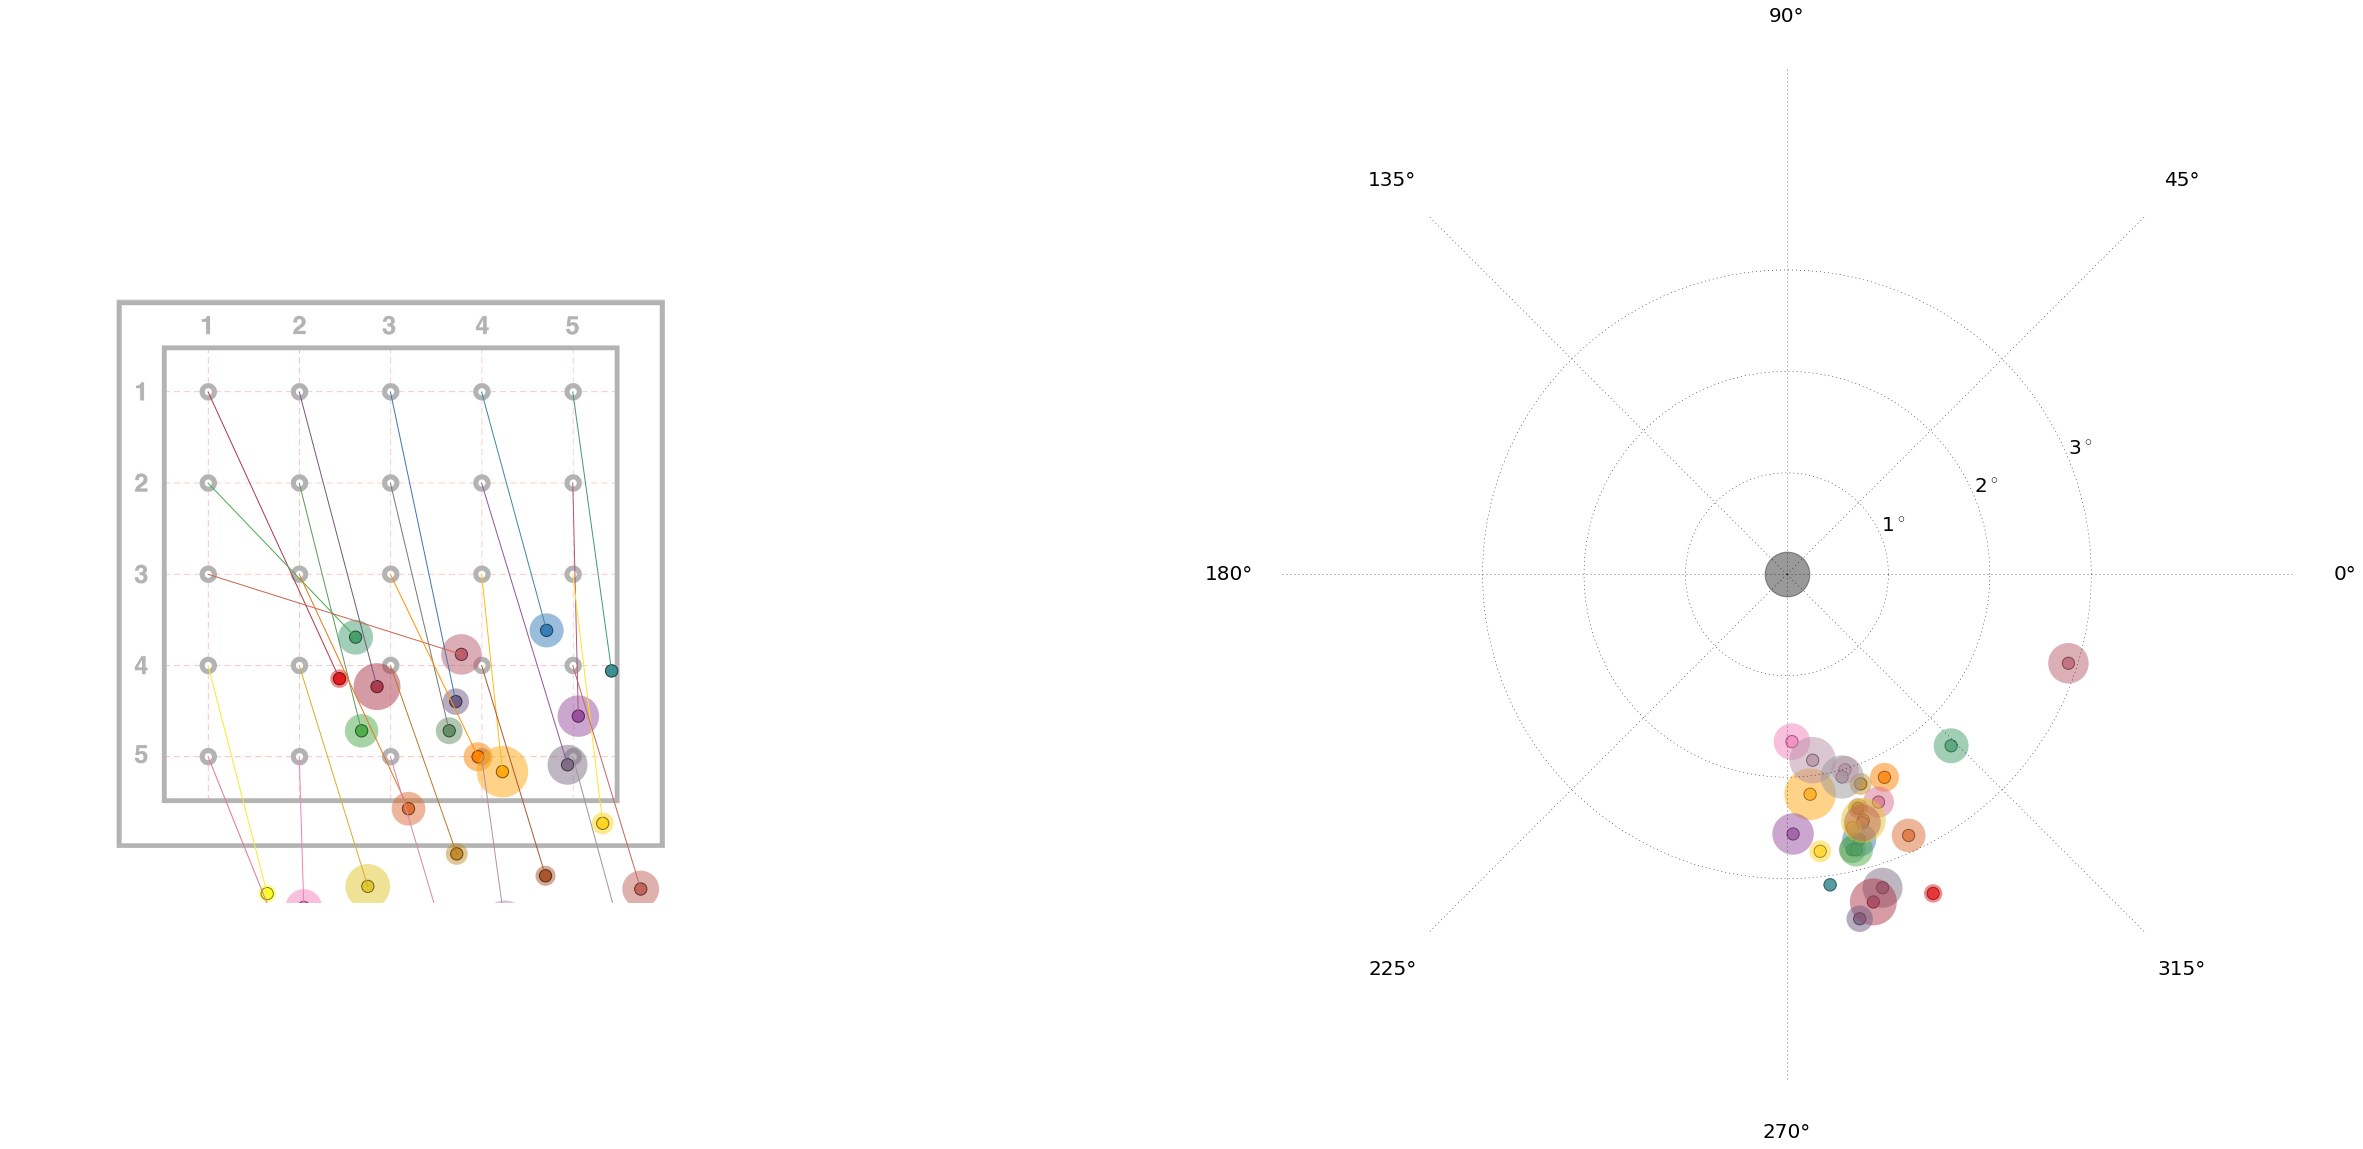

In [55]:
calibGrid = join(EXP_dir, 'referenceGrids/calibrationGrid.jpg')
gridImg = mpimg.imread(calibGrid)

matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
fig = plt.figure(figsize=(40,20))

### Calib Plot
ax = fig.add_subplot(131)
ax.axis("off")
ax.imshow(gridImg, cmap='Greys_r', alpha=0.3)

# centroid location
ax.scatter(summary_df.centX, summary_df.centY, s=150, c=summary_df.ptIdx, cmap=cm.Set1)

# rms
ax.scatter(summary_df.centX, summary_df.centY, 
           s=2000*summary_df.RMS, 
           c=summary_df.ptIdx, 
           edgecolor='none',
           cmap=cm.Set1, alpha=0.5)

# draw connecting lines
cmap = plt.cm.get_cmap('Set1')
for p in sort(summary_df.ptIdx):
    thisPt = summary_df[summary_df.ptIdx == p]
    
    # figure out the x,y of this calibration point
    p = p-1
    col = p % 5 + 1
    row = floor(np.true_divide(p,5))+1
    idealLocation = ((1000/6)*col, (1000/6)*row)
    
    # plot a line connecting everything
    thisColor = cmap(np.true_divide(p+1,25))
    xs = [thisPt.centX, idealLocation[0]]
    ys = [thisPt.centY, idealLocation[1]]
    ax.plot(xs, ys, color=thisColor, lw=1)

ax.set_ylim(-100,1100)
ax.set_xlim(-100,1100)
ax.invert_yaxis()


#### Polar Plot
ax2 = fig.add_subplot(122, polar=True)
ax2.set_ylim(0,5)
ax2.set_yticks([1,2,3])
ax2.yaxis.set_ticklabels(['1$^\circ$ ', '2$^\circ$ ', '3$^\circ$ '])		# for degree symbol
ax2.scatter(np.deg2rad(summary_df['centAngle'].astype(float)), 
                        summary_df['centDist'].astype(float), 
                        s=150, 
                        edgecolor='black', 
                        c=summary_df['ptIdx'], 
                        cmap='Set1', 
                        alpha=.74)
# rms
ax2.scatter(np.deg2rad(summary_df['centAngle'].astype(float)), 
                        summary_df['centDist'].astype(float), 
                        s=2000*summary_df.RMS, 
                        edgecolor='none', 
                        c=summary_df['ptIdx'], 
                        cmap='Set1', 
                        alpha=.5)
ax2.scatter(0,0, s=2000, facecolor='black', alpha=.4)  # put circle at center for reference
ax2.spines['polar'].set_visible(False)

plt.savefig('test.pdf')